<a href="https://colab.research.google.com/github/Yassaadi/NLP_CV/blob/main/P6_Assaadi_Yassine_1_notebook_220223.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Libraries and methods

In [1]:
#GOOGLE COLAB
from google.colab import drive
drive.mount('/content/drive')
from IPython.display import Image

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
!pip install transformers
!pip install gensim

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.1/7.1 MB 21.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 236.8/236.8 kB 24.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 48.7 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
#pip install -U sentence-transformers

In [4]:
#BASIC LIBs
import pandas as pd
import numpy as np

#STAT TOOLS
from math import sqrt
from scipy import stats #BoxCox
import random
import statistics
from numpy.lib.function_base import percentile
from pandas.core.algorithms import quantile

#GRAPHS & PLOTS
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import plotly.io as pio


from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.preprocessing import OrdinalEncoder

#Classifiers
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering, MiniBatchKMeans
from sklearn.neighbors import NearestNeighbors

#METRICS
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import silhouette_score, silhouette_samples, adjusted_rand_score,accuracy_score

#DATA SPLITING 
from sklearn.model_selection import cross_val_score, KFold, train_test_split

ImportError: ignored

In [ ]:
#IMAGE READING AND PROCESSING
from PIL import Image
import cv2 as cv
import os
import glob
import keras.utils as image 

#KERAS  
from keras.layers import Dense
from keras import Model

#Images feature extractors
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input as ppi_VGG16
from keras.applications.resnet import ResNet50 
from keras.applications.resnet import preprocess_input as ppi_ResNet


#from transformers import BertTokenizer, VisualBertModel

In [ ]:
import re
import keras
import tensorflow as tf
import string
from gensim.models import KeyedVectors
from gensim.scripts.glove2word2vec import glove2word2vec

import nltk
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('stopwords')
nltk.download('omw-1.4')

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

from transformers import BertTokenizer, TFBertModel

# 2. Loading data

## Load descriptions

In [ ]:
def data_load(path):
  df = pd.read_csv(path,encoding="utf-8") 
  print(df.shape)
  print(df.columns)
  return df

In [ ]:
txt_path= "/content/drive/MyDrive/Colab Notebooks/P6-ImageTxt clustering/flipkart_com-ecommerce_sample_1050.csv"
img_path = '/content/drive/MyDrive/Colab Notebooks/P6-ImageTxt clustering/Images'

df = pd.read_csv(txt_path,encoding="utf-8") 

In [ ]:
df.head(1)

,uniq_id,crawl_timestamp,product_url,product_name,product_category_tree,pid,retail_price,discounted_price,image,is_FK_Advantage_product,description,product_rating,overall_rating,brand,product_specifications
0,55b85ea15a1536d46b7190ad6fff8ce7,2016-04-30 03:22:56 +0000,http://www.flipkart.com/elegance-polyester-mul...,Elegance Polyester Multicolor Abstract Eyelet ...,"[""Home Furnishing >> Curtains & Accessories >>...",CRNEG7BKMFFYHQ8Z,1899.0,899.0,55b85ea15a1536d46b7190ad6fff8ce7.jpg,False,Key Features of Elegance Polyester Multicolor ...,No rating available,No rating available,Elegance,"{""product_specification""=>[{""key""=>""Brand"", ""v..."


## Features engineering

In [ ]:
data= df[['uniq_id', 'product_name', 'description', 'product_category_tree']]

In [ ]:
def find_between( s, first, last ):
  return re.search(first+'(.*?)'+ last, s).group(1)

In [ ]:
data['category'] = data['product_category_tree'].apply(lambda x: find_between( x, '"', '>>' ))

<ipython-input-13-b6a917110c2d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['category'] = data['product_category_tree'].apply(lambda x: find_between( x, '"', '>>' ))


In [ ]:
data['category'].unique()

array(['Home Furnishing ', 'Baby Care ', 'Watches ',
       'Home Decor & Festive Needs ', 'Kitchen & Dining ',
       'Beauty and Personal Care ', 'Computers '], dtype=object)

In [ ]:
encoder = OrdinalEncoder()

encoding = encoder.fit_transform(data[['category']])

data['category_label'] = encoding.astype(int)

<ipython-input-15-f3c7ff82a4cc>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['category_label'] = encoding.astype(int)


## Load images

In [ ]:
def img_read(uniq_id):
  if (uniq_id+ '.jpg') in os.listdir(img_path):
    return Image.open(img_path +'/'+ uniq_id + '.jpg')
  else:
    return 'None'

data['Product_Image'] = data['uniq_id'].apply(img_read)

/usr/local/lib/python3.8/dist-packages/PIL/Image.py:2797: DecompressionBombWarning: Image size (93680328 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  warnings.warn(
<ipython-input-16-556465b5b4ce>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Product_Image'] = data['uniq_id'].apply(img_read)


### Messing images check

In [ ]:
data[data['Product_Image'] == 'None'].shape[0]

0

# 3. Useful functions

Show product image

In [ ]:
#Funtion: Show image of a given product
def image_product(n):
  return data.loc[n,'Product_Image']

In [ ]:
def model_features(model, ppi, uniq_id): #ppi: preprocessing process for the model
  IP = img_path +'/'+ uniq_id + '.jpg'
  img = image.load_img(IP, target_size=(224, 224))  # Load image
  img = image.img_to_array(img)  # Convert to numpy array
  img = np.expand_dims(img, axis=0)#reshape((1, img.shape[0], img.shape[1], img.shape[2]))  # Sample creation  
  img_features = model.predict(ppi(img))  # VGG16 pretraitement 
  img_features = np.array(img_features).flatten() #output flattened 
  return img_features

Features dimension reduction and plot

In [ ]:
#Features dimension reduction and plot function

def feat_dim(df, fx, fy, MODEL_features, Model):
  #Stack vertically feature vectors
  corpus_matrix = np.vstack(df[MODEL_features])

  #Plot corpus vocab

  # Apply t-SNE to reduce the dimensions of the embeddings to 2D
  #tsne = TSNE(n_components=2, random_state=42)
  pca = PCA(n_components=2)

  #tsne_embeddings = tsne.fit_transform(corpus_matrix)
  pca_embeddings = pca.fit_transform(corpus_matrix)

  # Plot the embeddings in a scatter plot
  x=[]
  y=[]

  for vec in pca_embeddings:
    x.append(vec[0])
    y.append(vec[1])

  df[fx] = x
  df[fy] = y

  plt.figure(figsize=(10, 10))
  fig = px.scatter(df, x=fx , y=fy, color="category",
                   title = f'{Model}: Product features representation after dimension reduction' )
  fig.show()
  return df

## Clustering functions

### Kmeans tunning

In [ ]:
def Kmeans_tuning(X, clusters_set):
  silhouette_scr = []
  inertie = []
  LABELS = []
  #centroids = []
  for k in clusters_set:
    kmeans = KMeans(n_clusters = k)
    labels = kmeans.fit_predict(X)
    I= kmeans.inertia_
    inertie.append(I)
    S=silhouette_score(X, labels)
    silhouette_scr.append(S)
    LABELS.append(labels)
    #centroids.append(kmeans.cluster_centers_)
    print(f'n_cluster: {k}  Silhouette_score={S}, Inertia= {I}\n')
  kmeans_DF = pd.DataFrame({'n_clusters' : clusters_set, 'Silhouette_score': silhouette_scr, 'Inertie' : inertie }) 
  return (LABELS, kmeans_DF)

In [ ]:
def MBKmeans_tuning(X, clusters_set):
  silhouette_scr = []
  inertie = []
  LABELS = []
  #centroids = []
  for k in clusters_set:
    MBkmeans = MiniBatchKMeans(n_clusters = k)
    labels = MBkmeans.fit_predict(X)
    I= MBkmeans.inertia_
    inertie.append(I)
    S=silhouette_score(X, labels)
    silhouette_scr.append(S)
    LABELS.append(labels)
    #centroids.append(kmeans.cluster_centers_)
    print(f'n_cluster: {k}  Silhouette_score={S}, Inertia= {I}\n')
  kmeans_DF = pd.DataFrame({'n_clusters' : clusters_set, 'Silhouette_score': silhouette_scr, 'Inertie' : inertie }) 
  return (LABELS, kmeans_DF)

In [ ]:
def Kmeans_tuning_plot(kmeans_DF, model):

  fig, ax1 = plt.subplots(figsize=(13, 4))
  ax2 = ax1.twinx()
  #***************************Silhouette plot***************************#
  ax1.plot( 'n_clusters', 'Silhouette_score', data=kmeans_DF, marker='o', markerfacecolor='blue', markersize=8, color='skyblue', linewidth=3)
  #***************************Inertia plot***************************# 
  ax2.plot( 'n_clusters', 'Inertie', data=kmeans_DF, marker='o', markerfacecolor='blue', markersize=8, color='green', linewidth=3)
  # set title and axis labels
  ax1.set_title(label= f'{model}: Silhouette and inertia scores vs dimension/Clusters', fontsize=14 )

  # set legend for both axes
  lines1, labels1 = ax1.get_legend_handles_labels()
  lines2, labels2 = ax2.get_legend_handles_labels()
  ax1.legend(lines1 + lines2, labels1 + labels2, loc='best')

  plt.show()

### Features clusters plot

In [ ]:
def TSNE_clusters(X, n_clusters, labels, model ):

  #Dimension reduction for scatetering plot 
  tsne = TSNE(n_components=2, perplexity=30.0, random_state=0)
  X = tsne.fit_transform(X)
  #***************************Clustering plot***************************#
  u_labels = np.unique(labels)  
  for i in u_labels:
      plt.scatter(X[labels == i , 0] , X[labels == i , 1] , label = f'Cluster {i+1}')
  plt.title(f'{model}: TSNE Scatter plot of n={n_clusters} clusters', fontsize=14 )
  plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.2), ncol=len(u_labels))
  plt.show()

In [ ]:
def PCA_clusters(X, n_clusters, labels, model ):

  #Dimension reduction for scatetering plot 
  pca = PCA(2)
  X = pca.fit_transform(X)
  #***************************Clustering plot***************************#
  u_labels = np.unique(labels)  
  for i in u_labels:
      plt.scatter(X[labels == i , 0] , X[labels == i , 1] , label = f'Cluster {i+1}')
  plt.title(f'{model}: PCA Scatter plot of n={n_clusters} clusters', fontsize=14 )
  plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.2), ncol=len(u_labels))
  plt.show()

Cluster size plot

In [ ]:
def Cluster_size_plot(n_clusters, labels, model):
  #***************************Size of clusters computation*******************
  cluster_size = []
  #labels = list(labels)

  for i in range(labels.min(), n_clusters):
    size = list(labels).count(i)
    cluster_size.append(size)
    print(f"Cluster : {i+1} => Size = {size}")

  #***************************Clusters labeling****************************** 
  labels_name=[]
  if labels.min()==-1:
    labels_name.append('Outliers')    
  for i in range(n_clusters):
    labels_name.append(f'Cluster{i+1}')

  #***************************Size of clusters plot*************************** 
  pull= np.zeros(shape=len(labels_name))
  pull[cluster_size.index(min(cluster_size))]=0.2

  fig = go.Figure(data=[go.Pie(labels=labels_name, values=cluster_size, textinfo='label+percent', pull=pull )])
  fig.update_layout(title_text=f'{model}: Number of products per cluster\n')
  fig.update_layout(legend=dict(orientation="h", yanchor="bottom", y=1.02, xanchor="right", x=1))
  fig.show()

# 4. Image feature extraction

## VGG Net

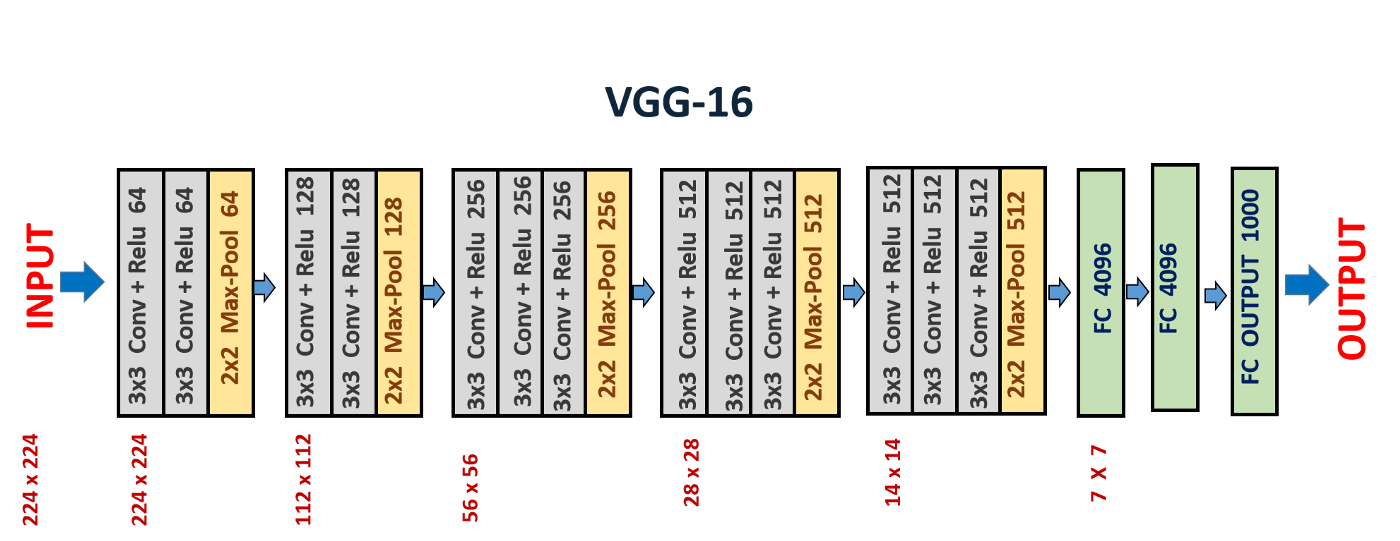

In [ ]:
# VGG16 pretrained on ImageNet without dense layers
VGG16_model = VGG16(weights="imagenet", include_top=False, input_shape=(224, 224, 3))
data['VGG16_features'] = data['uniq_id'].apply(lambda x : model_features(VGG16_model, ppi_VGG16, x))

1/1 [==============================] - 0s 21ms/step


/usr/local/lib/python3.8/dist-packages/PIL/Image.py:2797: DecompressionBombWarning:

Image size (93680328 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.



1/1 [==============================] - 0s 21ms/step


In [ ]:
data = feat_dim(data, 'vgg16_x', 'vgg16_y', 'VGG16_features' , 'VGG16')

<Figure size 720x720 with 0 Axes>

## RESNET

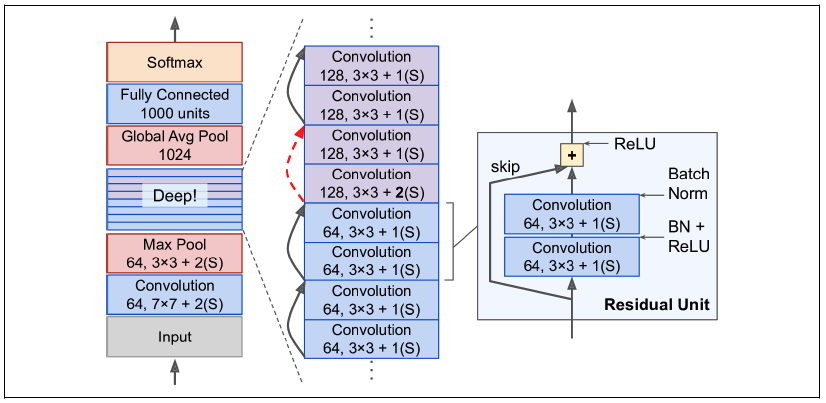

In [ ]:
resnet50_model = ResNet50(weights="imagenet", include_top=False, input_shape=(224, 224, 3))
data['RESNET_features'] = data['uniq_id'].apply(lambda x : model_features(resnet50_model, ppi_ResNet, x))

1/1 [==============================] - 0s 27ms/step


/usr/local/lib/python3.8/dist-packages/PIL/Image.py:2797: DecompressionBombWarning:

Image size (93680328 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.



1/1 [==============================] - 0s 26ms/step


In [ ]:
data = feat_dim(data, 'resnet_x', 'resnet_y', 'RESNET_features' , 'RESNET')

<Figure size 720x720 with 0 Axes>

## SIFT

### Extracting features

In [ ]:
#Call SIFT features creators from cv
sift = cv.xfeatures2d.SIFT_create()

def sift_features(img): #img is a PILL type
  #Convert image to gray scale
  gray= cv.cvtColor(np.array(img),cv.COLOR_BGR2GRAY)
  #Get sift descriptors of the image
  keypoints, descriptors = sift.detectAndCompute(gray,None)
  return(descriptors)

NameError: ignored

In [ ]:
SIFT_features = []
imgs = data['Product_Image'].tolist()

#Apply to products 0 to 676
for i in range(677):
  SIFT_features.append(sift_features(imgs[i]))

#Append features of Product 677: (Notebook shot down when trying to extract SIFT features of product 677: sift_features(data.loc[677,'Product_Image']))
SIFT_features.append(np.zeros(128))

#Apply to the rest of products >678
for i in range(678, len(imgs)):  
  SIFT_features.append(sift_features(imgs[i]))

#Attribute 0 vector feature to 343: Result of sift features extraction f product 343 is Nontype object
SIFT_features[343] = np.zeros(128)

#Add SIFT features column to main dataframe
data['SIFT_features'] = SIFT_features

SIFT limitation : grayscale operating algorithm

The features described in this paper use only a monochrome intensity image, so further distinctiveness could be derived from including illumination-invariant color descriptors (Funt and Finlayson, 1995; Brown and Lowe, 2002)

Incidence: Problem with product 677 and 343 features extraction

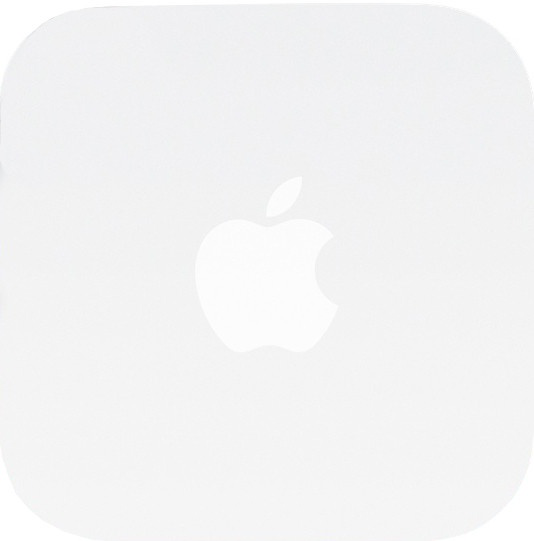

In [ ]:
image_product(677)
image_product(343)

### Bag of visual features

In [ ]:
#Concatenate all features vectors vertically (All expressed in 128 space dimension)
X_BOVW = np.vstack(np.array(SIFT_features))
print(f"\n\nthe total number of SIFT features of all products images is {X_BOVW.shape[0]}")

<ipython-input-150-acbcf2500b90>:2: VisibleDeprecationWarning:

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.





the total number of SIFT features of all products images is 5996118


In [ ]:
visual_vocab_dim = 30
MBkmeans = MiniBatchKMeans(n_clusters = visual_vocab_dim)
labels = MBkmeans.fit_predict(X_BOVW)

In [ ]:
#Define clusters set
dimensions = [10, 20, 30, 40]
#Perform kmeans tunning to select optimum features dimension
LABELS, kmeans_DF = MBKmeans_tuning(X_BOVW, dimensions) 
#Plot kmeans tuning results
Kmeans_tuning_plot(kmeans_DF, 'SIFT features')

KeyboardInterrupt: ignored

In [ ]:
#Features dimension choice
visual_vocab_dim = 30
#Get clusters labels
#labels = LABELS[dimensions.index(visual_vocab_dim)]

#Plot spacial visualization of SIFT features clusters
PCA_clusters(X_BOVW, visual_vocab_dim, labels, 'SIFT features' )

#Plot clusters size (Count of SIFT features per cluster)
#Cluster_size_plot(visual_vocab_dim, labels, 'SIFT features' )

Histogram of visual vocabulary

In [ ]:
def vec_histogram(feat_img, graph, title):
  y=MBkmeans.predict(feat_img)
  h= np.histogram(y, bins=range(visual_vocab_dim+1)) #To make sure I have same length vectors (vocab size) to represent each image 
  if graph==True:
    _ = plt.hist(y, bins=range(visual_vocab_dim+1))
    plt.title(title)
    plt.xlabel("cluster")
    plt.ylabel("features count ")
    plt.show()
  return h[0]

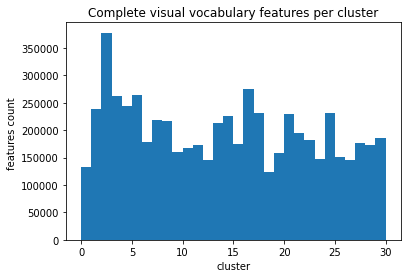

In [ ]:
h= vec_histogram(X_BOVW, True, "Complete visual vocabulary features per cluster")

In [ ]:
vec_histogram(data.loc[2, "SIFT_features"], True, "BOVW feature representation: product 2")

ValueError: ignored

In [ ]:
#Get SIFT features normalized for every image. Which are the representation of sift description points's cluster  count 
data['BOVW_features'] = data['SIFT_features'].apply(lambda x: vec_histogram(x, False, '') ) 

ValueError: ignored

In [ ]:
data = feat_dim(data, 'bovw_x', 'bovw_y', 'BOVW_features' , 'BOVW')

KeyError: ignored

In [ ]:
Path= "/content/drive/MyDrive/Colab Notebooks/P6-ImageTxt clustering/images_Features.csv"

data_sift = pd.read_csv(Path,encoding="utf-8") 

In [ ]:
data_sift = feat_dim(data_sift, 'bovw_x', 'bovw_y', 'BOVW_features' , 'BOVW')

ValueError: ignored

# 5. Text features extraction

## Text data preprocessing

In [ ]:
def basic_len(text):
  sentences = text.split(".") 
  words = text.split(" ") 
  if(sentences[len(sentences)-1]==""): 
    sentence_length = len(words) / len(sentences)-1
  else:
    sentence_length = len(words) / len(sentences)
  return sentence_length

In [ ]:
data['Basic_Length']= data['description'].apply(basic_len)

<ipython-input-109-fb9e78881a77>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Basic_Length']= data['description'].apply(basic_len)


/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


median_lenght = 17.003921728119515
max_lenght = 145.0



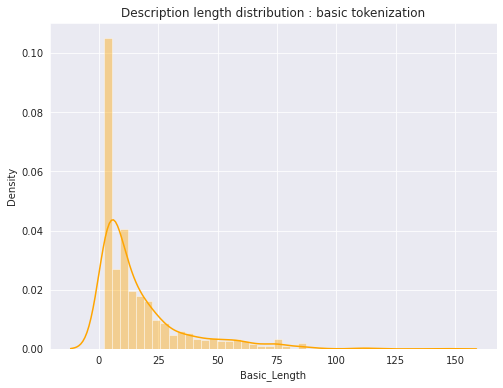

In [ ]:
sns.set_style('darkgrid')
plt.figure(figsize=(8,6))
sns.distplot(data['Basic_Length'], color='orange').set_title('Description length distribution : basic tokenization')

median_lenght = data['Basic_Length'].mean()
max_length = data['Basic_Length'].max()

print(f'median_lenght = {median_lenght}\nmax_lenght = {max_length}\n')

In [ ]:
def text_preprocessor(description):

  #CAPITAL TO SMALL
  text = description.lower()

  #URLs ELIMINATION     
  pattern = re.compile('http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+')  
  text = pattern.sub('', text)
  
  #Extra space removal
  text = re.sub(r"\s+", " ", text)

  #EMOJIs
  emoji = re.compile("["
                      u"\U0001F600-\U0001FFFF"  # emoticons       
                      u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                      u"\U0001F680-\U0001F6FF"  # transport & map symbols
                      u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                      u"\U00002702-\U000027B0"       
                      u"\U000024C2-\U0001F251"              
                      "]+", flags=re.UNICODE)                     
  text = emoji.sub(r'', text)

  #Handling contractions
  text = re.sub(r"i'm", "i am", text)
  text = re.sub(r"he's", "he is", text)
  text = re.sub(r"she's", "she is", text)
  text = re.sub(r"that's", "that is", text)        
  text = re.sub(r"what's", "what is", text)
  text = re.sub(r"where's", "where is", text) 
  text = re.sub(r"\'ll", " will", text)  
  text = re.sub(r"\'ve", " have", text)  
  text = re.sub(r"\'re", " are", text)
  text = re.sub(r"\'d", " would", text)
  text = re.sub(r"\'ve", " have", text)
  text = re.sub(r"won't", "will not", text)
  text = re.sub(r"don't", "do not", text)
  text = re.sub(r"did't", "did not", text)
  text = re.sub(r"can't", "can not", text)
  text = re.sub(r"it's", "it is", text)
  text = re.sub(r"couldn't", "could not", text)
  text = re.sub(r"haven't", "have not", text)

  #Symbol caracters elimination
  text = re.sub(r"[,.\"!@#$%^&*(){}?/;`~:<>+=-]", "", text)
  
  #Get text tokens
  tokenz = word_tokenize(text)

  #Remove punctuation
  table = str.maketrans('', '', string.punctuation)
  stripped = [word.translate(table) for word in tokenz]

  #Keep only alpha words
  words = [word for word in stripped if word.isalpha()]

  #Stemming, Process lemming instead
  #stemmer = PorterStemmer() 
  #words = [stemmer.stem(word) for word in words]

  #Lemming
  lemmatizer = WordNetLemmatizer()
  words = [lemmatizer.lemmatize(word) for word in words]

  #STOP WORDS
  stop_words = set(stopwords.words("english"))
  stop_words.discard("not")

  #JOINING
  words = [w for w in words if w not in stop_words]
  words = ' '.join(words)
    
  return words 

In [ ]:
corpus = [text_preprocessor(description) for description in data["description"]]

## Extractors

### Bag Of Words

BOW features

In [ ]:
BOW = CountVectorizer()
#Fit BOW to all descriptions( corpus)
BOW.fit(corpus)
#BOW vocabulary
bow_vocab = BOW.vocabulary_
#words of BOW vocab
bow_words = [word for word, index in bow_vocab.items()]

In [ ]:
def bow_features(description):
  preproc = text_preprocessor(description)
  return BOW.transform([preproc]).toarray()
#Attention: [] for transform method, and toarray to switch to dense matrix

data['BOW_features'] = data['description'].apply(bow_features)

<ipython-input-114-5913d084ae82>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['BOW_features'] = data['description'].apply(bow_features)


In [ ]:
data = feat_dim(data, 'bow_x', 'bow_y', 'BOW_features', 'BOW')

<ipython-input-101-4151fb039785>:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[fx] = x
<ipython-input-101-4151fb039785>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[fy] = y


<Figure size 720x720 with 0 Axes>

Get features of products names using BOW

In [ ]:
data['Names_bow_features'] = data['product_name'].apply(bow_features)

<ipython-input-116-693b723c8bc8>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
data = feat_dim(data, 'names_bow_x', 'names_bow_y', 'Names_bow_features', 'Names/BOW')

<ipython-input-101-4151fb039785>:24: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-101-4151fb039785>:25: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



<Figure size 720x720 with 0 Axes>

### TF-IDF

TFIDF features

In [ ]:
TFIDF = TfidfVectorizer(max_df=0.95, min_df=1)
#Fit TFIDF to all descriptions( corpus)
TFIDF.fit(corpus)
#BOW vocabulary
tfidf_vocab = TFIDF.vocabulary_
#words of BOW vocab
tfidf_words = [word for word, index in tfidf_vocab.items()]

In [ ]:
def tfidf_features(description):
  preproc = text_preprocessor(description)
  return TFIDF.transform([preproc]).toarray()
#Attention: [] for transform method, and toarray to switch to dense matrix

data['TFIDF_features'] = data['description'].apply(tfidf_features)

In [ ]:
data = feat_dim(data, 'tfidf_x', 'tfidf_y', 'TFIDF_features', 'TF-IDF')

<Figure size 720x720 with 0 Axes>

Get features of products names using tfidf

In [ ]:
data['Names_tfidf_features'] = data['product_name'].apply(tfidf_features)

In [ ]:
data = feat_dim(data, 'names_tfidf_x', 'names_tfidf_y', 'Names_tfidf_features', 'Names/TFIDF')

<Figure size 720x720 with 0 Axes>

### GLOVE

In [ ]:
#Download pretrained glove model and convert GloVe text file to word2vec format
glove_input_file = '/content/drive/MyDrive/Colab Notebooks/P6-ImageTxt clustering/glove.6B.300d.txt'
word2vec_output_file = 'glove.6B.300d.word2vec.txt'
glove2word2vec(glove_input_file, word2vec_output_file)

#Load word2vec-format GloVe embeddings
glove_model = KeyedVectors.load_word2vec_format(word2vec_output_file, binary=False)

#Get glove features of a product description
def glove_features(description):
  #Preprocessing description text
  preproc = text_preprocessor(description)
  #Get GloVe features of each word
  text_vectors = []
  for word in preproc:
      try:
          word_vector = glove_model.get_vector(word)
          text_vectors.append(word_vector)
      except KeyError:
          pass

  #Average the GloVe features to get a single feature vector for the text
  if text_vectors:
      text_vector = np.mean(text_vectors, axis=0)
  else:
      text_vector = np.zeros(glove_model.vector_size)
  return text_vector
  
data['GLOVE_features'] = data['description'].apply(glove_features)

In [ ]:
data = feat_dim(data, 'glove_x', 'glove_y', 'GLOVE_features', 'GLOVE')

<Figure size 720x720 with 0 Axes>

Get features of products names using glove

In [ ]:
data['Names_glove_features'] = data['product_name'].apply(glove_features)

In [ ]:
data = feat_dim(data, 'names_glove_x', 'name_glove_y', 'Names_glove_features', 'Names/GLOVE')

<Figure size 720x720 with 0 Axes>

### BERT

#### Bert features

In [ ]:
bert_tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
bert_model = TFBertModel.from_pretrained("bert-base-uncased")

Some layers from the model checkpoint at bert-base-uncased were not used when initializing TFBertModel: ['nsp___cls', 'mlm___cls']
- This IS expected if you are initializing TFBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
All the layers of TFBertModel were initialized from the model checkpoint at bert-base-uncased.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertModel for predictions without further training.


#### Description max length

In [ ]:
def bert_len(doc):
  input_ids = bert_tokenizer.encode(doc, add_special_tokens=True)
  return len(input_ids) 

data['Bert_Length'] = data['description'].apply(bert_len)

Token indices sequence length is longer than the specified maximum sequence length for this model (577 > 512). Running this sequence through the model will result in indexing errors


/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



median_lenght = 108.13619047619048
max_lenght = 708


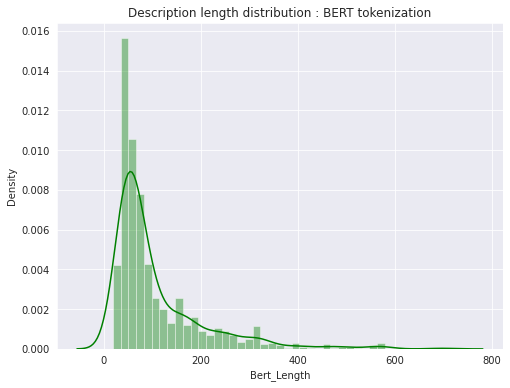

In [ ]:
sns.set_style('darkgrid')
plt.figure(figsize=(8,6))
sns.distplot(data['Bert_Length'], color= 'green' ).set_title('Description length distribution : BERT tokenization')
#Title
median_lenght = data['Bert_Length'].mean()
max_length = data['Bert_Length'].max()

print(f'median_lenght = {median_lenght}\nmax_lenght = {max_length}')

In [ ]:
def descr_BertToken(doc): 
  #Preparation of bert inputs
  doc_tokenized = bert_tokenizer.encode(doc                             #description to encode
                                        ,max_length = max_length        # Pad & truncate all sentences.
                                        ,add_special_tokens = True      # Add '[CLS]' and '[SEP]'          
                                        ,pad_to_max_length = True       # Padding to max_length
                                        ,return_attention_mask = True   # Construct masks
                                        ,truncation = True              # Truncation in case lengrh > max_legth
                                        ,return_tensors = 'tf'          # Return tensors
                                        )
  return doc_tokenized

In [ ]:
def bert_features(doc_token): #By getting [CLS] embeddings at the end of MLM+NSP
  bert_outputs = bert_model(doc_token)  
  return bert_outputs[0][: , 0, :] # Last hidden state corresponding to [CLS] embedding

In [ ]:
def reshape3_2(output):
  return  output.numpy().reshape(-1, output.shape[2])

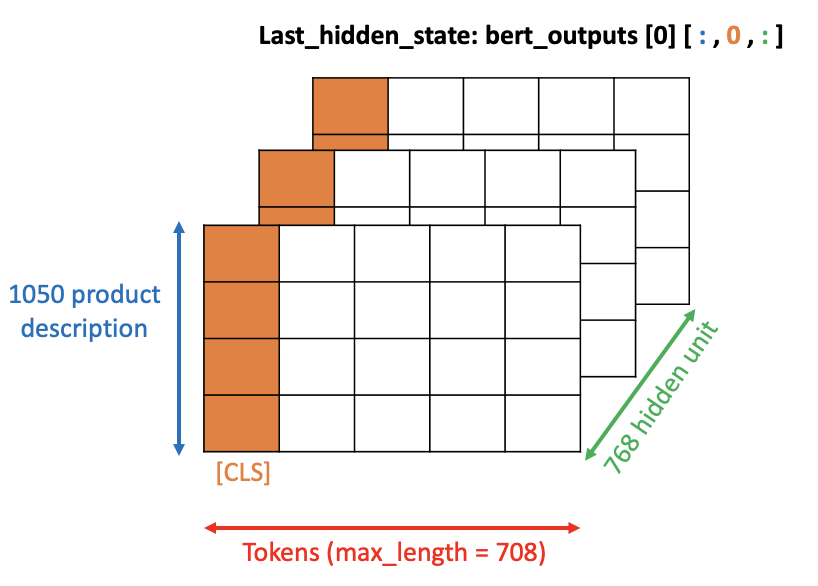

In [ ]:
data['BERT_features'] = data['description'].apply(lambda x : bert_features(descr_BertToken(x)).numpy())

/usr/local/lib/python3.8/dist-packages/transformers/tokenization_utils_base.py:2339: FutureWarning:

The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).



In [ ]:
data = feat_dim(data, 'bert_x', 'bert_y', 'BERT_features', 'BERT')

<Figure size 720x720 with 0 Axes>

Get features of products names using bert

In [ ]:
data['Names_bert_features'] = data['product_name'].apply(lambda x : bert_features(descr_BertToken(x)).numpy())

/usr/local/lib/python3.8/dist-packages/transformers/tokenization_utils_base.py:2339: FutureWarning:

The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).



In [ ]:
data = feat_dim(data, 'names_bert_x', 'name_bert_y', 'Names_bert_features', 'Names/BERT')

<Figure size 720x720 with 0 Axes>

### Universal sentence encoder (USE)

In [ ]:
import tensorflow_hub as hub

In [ ]:
use_embed = hub.load("https://tfhub.dev/google/universal-sentence-encoder/4")

In [ ]:
def use_features(doc):
  return use_embed([doc])
data['USE_features'] = data['description'].apply(lambda x: np.hstack(use_features(x).numpy()))

In [ ]:
data = feat_dim(data, 'use_x', 'use_y', 'USE_features', 'USE')

<Figure size 720x720 with 0 Axes>

Get features of products names using use

In [ ]:
data['Names_use_features'] = data['product_name'].apply(lambda x: np.hstack(use_features(x).numpy()))

In [ ]:
data = feat_dim(data, 'names_use_x', 'names_use_y', 'Names_use_features', 'Names/USE')

<Figure size 720x720 with 0 Axes>

# 6. Products clustering 

## Clustering features

In [ ]:
txt_models = ['BOW', 'TFIDF', 'GLOVE',  'BERT', 'USE']
img_models = ['VGG16','RESNET'] #'BOVW',
txt_names_models = ['name_GLOVE', 'name_BERT', 'name_USE']

In [ ]:
MODEL = {
    'BOW' : data['BOW_features'],
    'TFIDF' : data['TFIDF_features'],
    'GLOVE' : data['GLOVE_features'],
    'BERT' : data['BERT_features'],
    'USE' : data['USE_features'],
    #'BOVW' : data['BOVW_features'],
    'VGG16' : data['VGG16_features'],
    'RESNET' : data['RESNET_features'],
    'name_GLOVE' : data['Names_glove_features'],
    'name_BERT' : data['Names_bert_features'],
    'name_USE' : data['Names_use_features']
}

clusters = [2,4,7,9]

In [ ]:
ARI = {
    'BOW': 0.0,
    'TFIDF': 0.0,
    'GLOVE': 0.0,
    'BERT': 0.0,
    'USE': 0.0,
    'VGG16': 0.0,
    'RESNET': 0.0,
    'name_GLOVE': 0.0,
    'name_BERT': 0.0,
    'name_USE': 0.0
}

In [ ]:
print(f'Text features shape : {X_txt.shape}')
print(f'Name features shape : {X_name.shape}')
print(f'image features shape : {X_img.shape}')
print(f'product features shape : {X.shape}')

Text features shape : (1050, 512)
Name features shape : (1050, 4812)
image features shape : (1050, 100352)
product features shape : (1050, 105676)


In [ ]:
def clusters_model(clusters, model):
  X = np.vstack(np.array(MODEL[model]))
  _,LABELS, kmeans_DF = Kmeans_tuning(X, clusters)
  Kmeans_tuning_plot(kmeans_DF, model)
  return LABELS

In [ ]:
def cluster_evaluation(n_clusters, LABELS, model):

  X = np.vstack(np.array(MODEL[model])) 

  labels = LABELS[clusters.index(n_clusters)]

  TSNE_clusters(X, n_clusters , labels, model )

  Cluster_size_plot(n_clusters, labels, model)

  ari = adjusted_rand_score(labels, data['category_label'])
  
  return round(ari, 2)

## Clustering by image features 

### RESNET

n_cluster: 2  Silhouette_score=0.031051214784383774, Inertia= 300087232.0

n_cluster: 4  Silhouette_score=0.030011722818017006, Inertia= 289617216.0

n_cluster: 7  Silhouette_score=0.02340773120522499, Inertia= 281084288.0

n_cluster: 9  Silhouette_score=-0.0013052041176706553, Inertia= 277775872.0



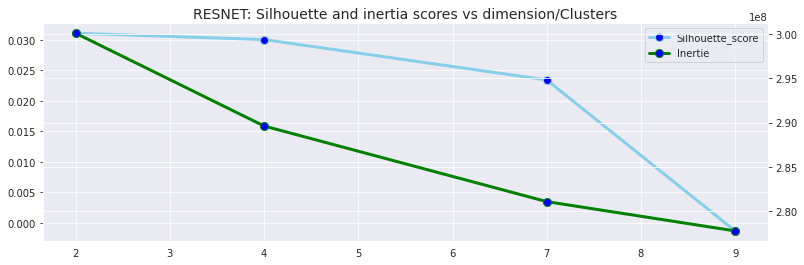

In [ ]:
model = 'RESNET'
LABELS = clusters_model(clusters, model)

/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:780: FutureWarning:

The default initialization in TSNE will change from 'random' to 'pca' in 1.2.

/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:790: FutureWarning:

The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.



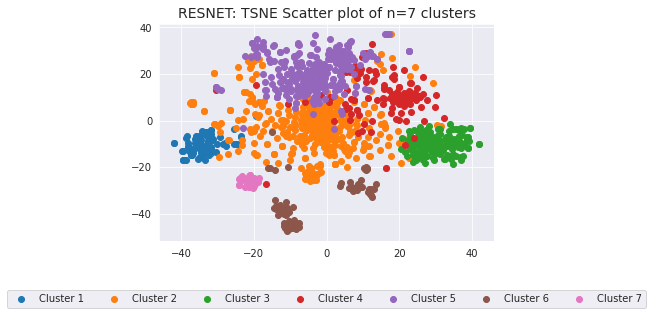

Cluster : 1 => Size = 79
Cluster : 2 => Size = 362
Cluster : 3 => Size = 137
Cluster : 4 => Size = 114
Cluster : 5 => Size = 248
Cluster : 6 => Size = 79
Cluster : 7 => Size = 31


In [ ]:
n_clusters = 7
ARI[model] = cluster_evaluation(n_clusters, LABELS, model)

### VGG16

n_cluster: 2  Silhouette_score=0.18031756579875946, Inertia= 3345341952.0

n_cluster: 4  Silhouette_score=0.09437322616577148, Inertia= 3180794624.0

n_cluster: 7  Silhouette_score=0.02863302268087864, Inertia= 3087108608.0

n_cluster: 9  Silhouette_score=0.06430773437023163, Inertia= 3028601856.0



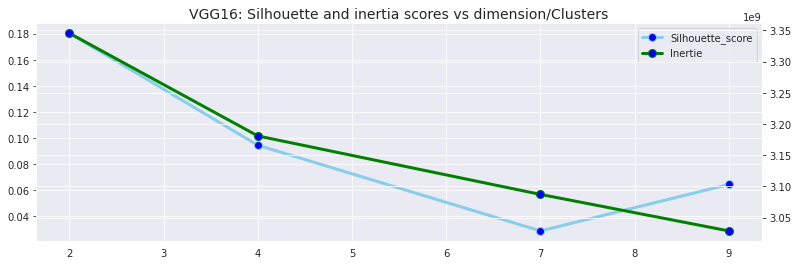

In [ ]:
model = 'VGG16'
LABELS = clusters_model(clusters, model)

/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:780: FutureWarning:

The default initialization in TSNE will change from 'random' to 'pca' in 1.2.

/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:790: FutureWarning:

The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.



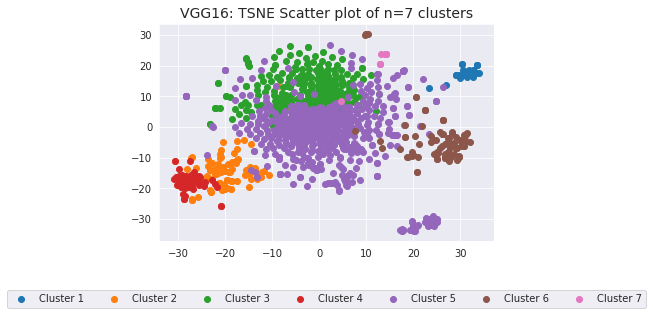

Cluster : 1 => Size = 32
Cluster : 2 => Size = 85
Cluster : 3 => Size = 231
Cluster : 4 => Size = 51
Cluster : 5 => Size = 549
Cluster : 6 => Size = 95
Cluster : 7 => Size = 7


In [ ]:
n_clusters = 7
ARI['VGG16'] = cluster_evaluation(n_clusters, LABELS, model)

### BOVW

In [ ]:
X_img = np.vstack(np.array(data['BOVW_features']))

## Clustering by text features 

### BOW

n_cluster: 2  Silhouette_score=0.3117544537108912, Inertia= 117059.79967627567

n_cluster: 4  Silhouette_score=0.18292119544615687, Inertia= 110931.37281868349

n_cluster: 7  Silhouette_score=-0.02570976938329589, Inertia= 102220.2547143867

n_cluster: 9  Silhouette_score=0.2309111623776935, Inertia= 96464.12575238339



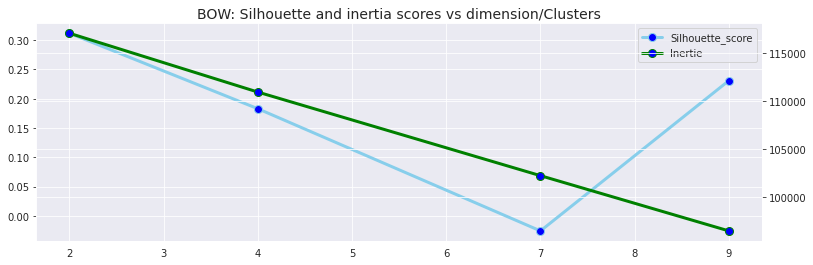

In [ ]:
model = 'BOW'
LABELS = clusters_model(clusters, model)

/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:780: FutureWarning:

The default initialization in TSNE will change from 'random' to 'pca' in 1.2.

/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:790: FutureWarning:

The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.



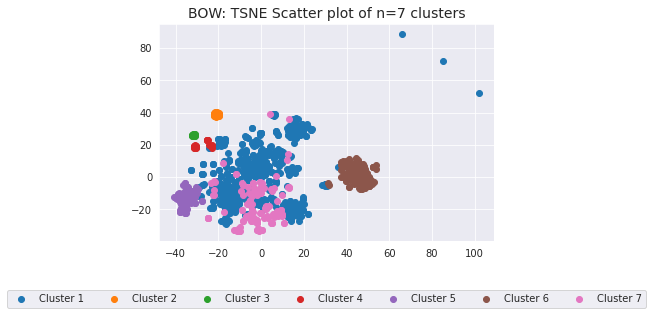

Cluster : 1 => Size = 659
Cluster : 2 => Size = 21
Cluster : 3 => Size = 11
Cluster : 4 => Size = 20
Cluster : 5 => Size = 77
Cluster : 6 => Size = 140
Cluster : 7 => Size = 122


In [ ]:
n_clusters = 7
ARI[model] = cluster_evaluation(n_clusters, LABELS, model)

In [ ]:
ARI

{'BOW': 0.16,
 'TFIDF': 0.31,
 'GLOVE': 0.0,
 'BERT': 0.0,
 'USE': 0.0,
 'VGG16': 0.22,
 'RESNET': 0.35,
 'name_GLOVE': 0.0,
 'name_BERT': 0.0,
 'name_USE': 0.0}

### TFIDF

n_cluster: 2  Silhouette_score=0.032040621965494245, Inertia= 961.2649848779972

n_cluster: 4  Silhouette_score=0.04518132282897884, Inertia= 909.5822546107639

n_cluster: 7  Silhouette_score=0.058926879362888686, Inertia= 875.3163437527419

n_cluster: 9  Silhouette_score=0.06506310386404718, Inertia= 851.3522387148826



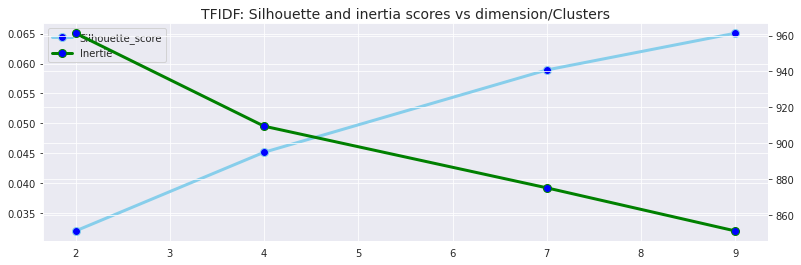

In [ ]:
model = 'TFIDF'
LABELS = clusters_model(clusters, model)

/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:780: FutureWarning:

The default initialization in TSNE will change from 'random' to 'pca' in 1.2.

/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:790: FutureWarning:

The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.



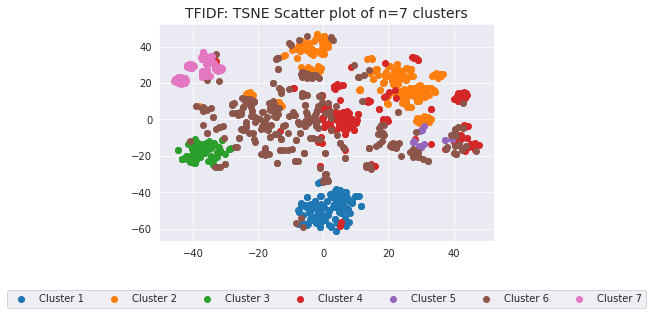

Cluster : 1 => Size = 139
Cluster : 2 => Size = 244
Cluster : 3 => Size = 80
Cluster : 4 => Size = 173
Cluster : 5 => Size = 21
Cluster : 6 => Size = 319
Cluster : 7 => Size = 74


In [ ]:
n_clusters = 7
ARI[model] = cluster_evaluation(n_clusters, LABELS, model)

### GLOVE

n_cluster: 2  Silhouette_score=0.12518273293972015, Inertia= 155.86935424804688

n_cluster: 4  Silhouette_score=0.1017320528626442, Inertia= 138.40025329589844

n_cluster: 7  Silhouette_score=0.0953986793756485, Inertia= 124.4853515625

n_cluster: 9  Silhouette_score=0.09681399166584015, Inertia= 119.25524139404297



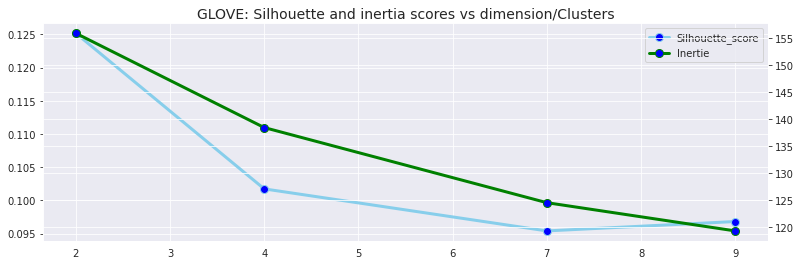

In [ ]:
model = 'GLOVE'
LABELS = clusters_model(clusters, model)

/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:780: FutureWarning:

The default initialization in TSNE will change from 'random' to 'pca' in 1.2.

/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:790: FutureWarning:

The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.



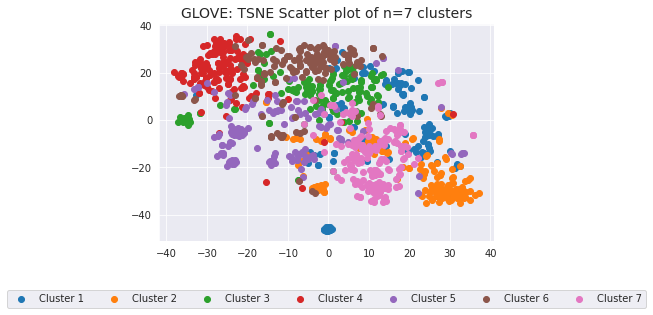

Cluster : 1 => Size = 126
Cluster : 2 => Size = 156
Cluster : 3 => Size = 138
Cluster : 4 => Size = 151
Cluster : 5 => Size = 151
Cluster : 6 => Size = 150
Cluster : 7 => Size = 178


In [ ]:
n_clusters = 7
ARI[model] = cluster_evaluation(n_clusters, LABELS, model)

### BERT 

n_cluster: 2  Silhouette_score=0.7536851167678833, Inertia= 7184.3525390625

n_cluster: 4  Silhouette_score=0.41929954290390015, Inertia= 3977.9013671875

n_cluster: 7  Silhouette_score=0.35557541251182556, Inertia= 2756.34375

n_cluster: 9  Silhouette_score=0.3573187589645386, Inertia= 2367.0634765625



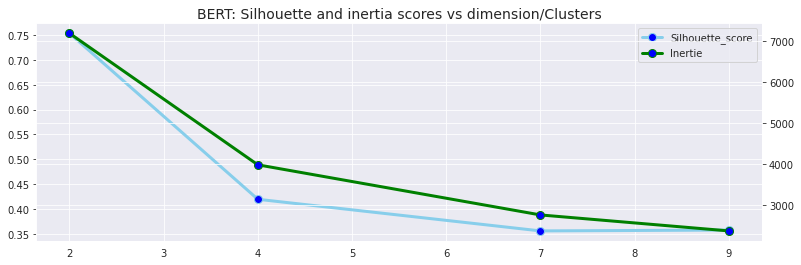

In [ ]:
model = 'BERT'
LABELS = clusters_model(clusters, model)

/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:780: FutureWarning:

The default initialization in TSNE will change from 'random' to 'pca' in 1.2.

/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:790: FutureWarning:

The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.



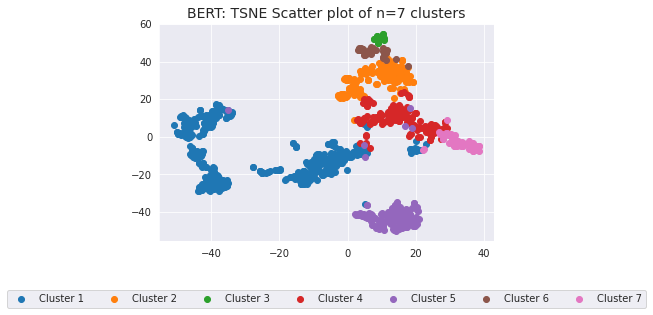

Cluster : 1 => Size = 459
Cluster : 2 => Size = 174
Cluster : 3 => Size = 20
Cluster : 4 => Size = 152
Cluster : 5 => Size = 144
Cluster : 6 => Size = 39
Cluster : 7 => Size = 62


In [ ]:
n_clusters = 7
ARI[model] = cluster_evaluation(n_clusters, LABELS, model)

### USE

n_cluster: 2  Silhouette_score=0.15471771359443665, Inertia= 622.157958984375

n_cluster: 4  Silhouette_score=0.09512830525636673, Inertia= 563.3338623046875

n_cluster: 7  Silhouette_score=0.10828874260187149, Inertia= 512.3253784179688

n_cluster: 9  Silhouette_score=0.10976207256317139, Inertia= 485.74163818359375



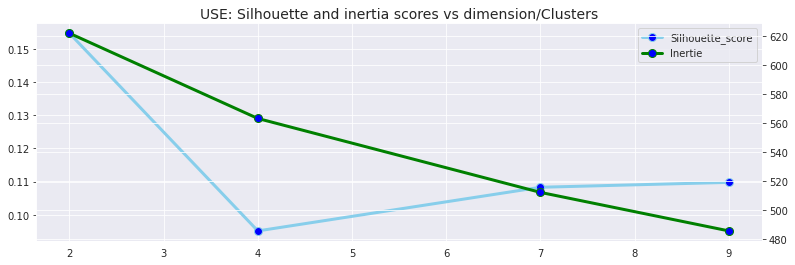

In [ ]:
model = 'USE'
LABELS = clusters_model(clusters, model)

/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:780: FutureWarning:

The default initialization in TSNE will change from 'random' to 'pca' in 1.2.

/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:790: FutureWarning:

The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.



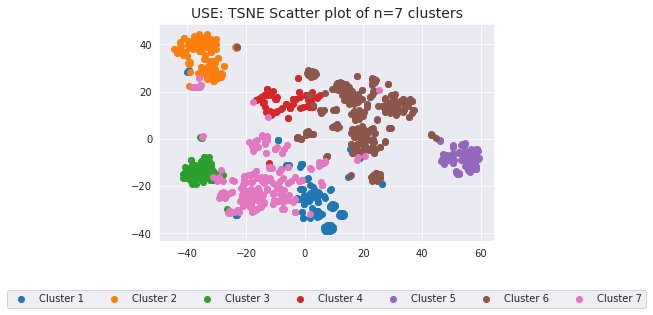

Cluster : 1 => Size = 126
Cluster : 2 => Size = 134
Cluster : 3 => Size = 82
Cluster : 4 => Size = 80
Cluster : 5 => Size = 91
Cluster : 6 => Size = 315
Cluster : 7 => Size = 222


In [ ]:
n_clusters = 7
ARI[model] = cluster_evaluation(n_clusters, LABELS, model)

## Clustering by name features 

### GLOVE names features

n_cluster: 2  Silhouette_score=0.11135823279619217, Inertia= 1000.8763427734375

n_cluster: 4  Silhouette_score=0.08789528161287308, Inertia= 885.5912475585938

n_cluster: 7  Silhouette_score=0.08692909777164459, Inertia= 806.5144653320312

n_cluster: 9  Silhouette_score=0.08405538648366928, Inertia= 767.2500610351562



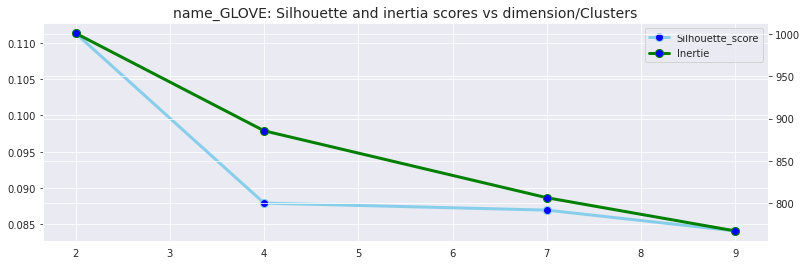

In [ ]:
model = 'name_GLOVE'
LABELS = clusters_model(clusters, model)

/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:780: FutureWarning:

The default initialization in TSNE will change from 'random' to 'pca' in 1.2.

/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:790: FutureWarning:

The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.



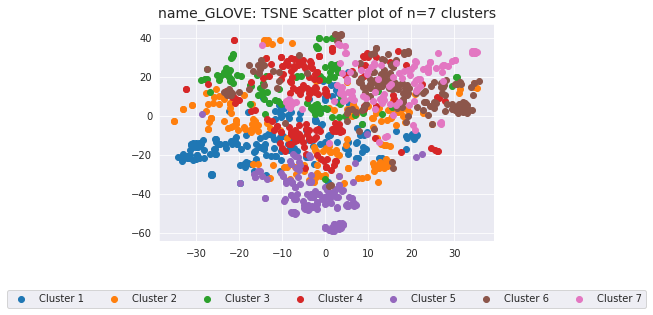

Cluster : 1 => Size = 186
Cluster : 2 => Size = 167
Cluster : 3 => Size = 102
Cluster : 4 => Size = 170
Cluster : 5 => Size = 139
Cluster : 6 => Size = 169
Cluster : 7 => Size = 117


In [ ]:
n_clusters = 7
ARI[model] = cluster_evaluation(n_clusters, LABELS, model)

### BERT names features

n_cluster: 2  Silhouette_score=0.5176318287849426, Inertia= 2239.3896484375

n_cluster: 4  Silhouette_score=0.35490018129348755, Inertia= 1122.98291015625

n_cluster: 7  Silhouette_score=0.1737002730369568, Inertia= 904.7335205078125

n_cluster: 9  Silhouette_score=0.12542757391929626, Inertia= 859.1857299804688



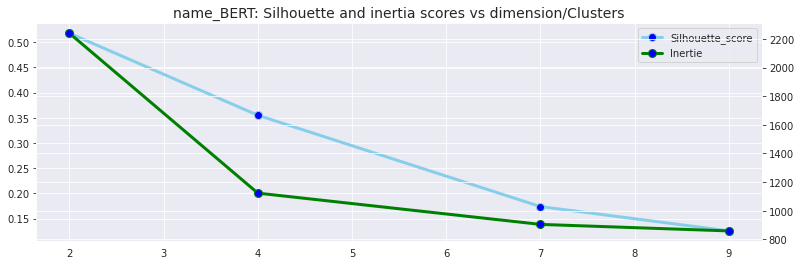

In [ ]:
model = 'name_BERT'
LABELS = clusters_model(clusters, model)

/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:780: FutureWarning:

The default initialization in TSNE will change from 'random' to 'pca' in 1.2.

/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:790: FutureWarning:

The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.



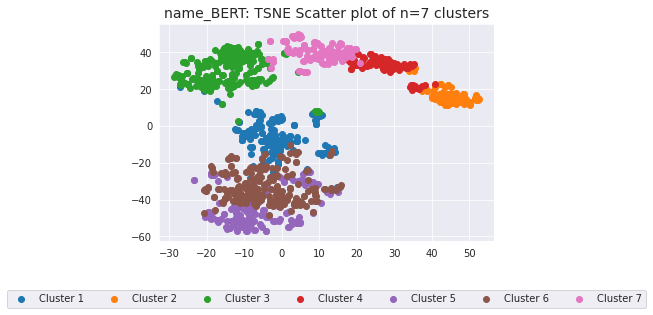

Cluster : 1 => Size = 175
Cluster : 2 => Size = 84
Cluster : 3 => Size = 219
Cluster : 4 => Size = 80
Cluster : 5 => Size = 159
Cluster : 6 => Size = 223
Cluster : 7 => Size = 110


In [ ]:
n_clusters = 7
ARI[model] = cluster_evaluation(n_clusters, LABELS, model)

### USE names features

n_cluster: 2  Silhouette_score=0.06982482969760895, Inertia= 850.3248291015625

n_cluster: 4  Silhouette_score=0.07737570255994797, Inertia= 784.5728759765625

n_cluster: 7  Silhouette_score=0.10377643257379532, Inertia= 722.0401000976562

n_cluster: 9  Silhouette_score=0.11418772488832474, Inertia= 691.3641357421875



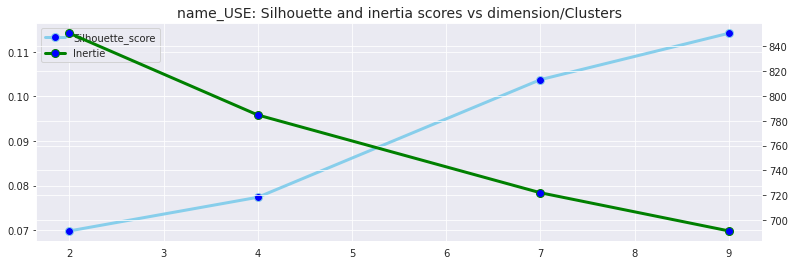

In [ ]:
model = 'name_USE'
LABELS = clusters_model(clusters, model)

/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:780: FutureWarning:

The default initialization in TSNE will change from 'random' to 'pca' in 1.2.

/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:790: FutureWarning:

The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.



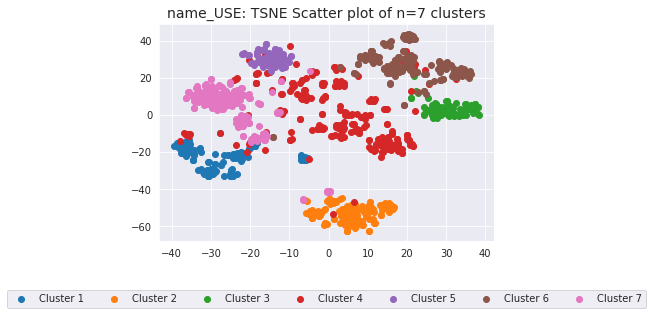

Cluster : 1 => Size = 127
Cluster : 2 => Size = 145
Cluster : 3 => Size = 85
Cluster : 4 => Size = 274
Cluster : 5 => Size = 76
Cluster : 6 => Size = 180
Cluster : 7 => Size = 163


In [ ]:
n_clusters = 7
ARI[model] = cluster_evaluation(n_clusters, LABELS, model)

In [ ]:
ARI

{'BOW': 0.16,
 'TFIDF': 0.27,
 'GLOVE': 0.19,
 'BERT': 0.13,
 'USE': 0.31,
 'VGG16': 0.22,
 'RESNET': 0.35,
 'name_GLOVE': 0.14,
 'name_BERT': 0.08,
 'name_USE': 0.57}

## Clustering by all features

In [ ]:
ari =[]
Model = []

for i in txt_models:
  for j in img_models:
    for k in txt_names_models:
      X_txt = np.vstack(np.array(MODEL[i]))
      X_img = np.vstack(np.array(MODEL[j]))
      X_name = np.vstack(np.array(MODEL[k]))
      X = np.concatenate(( X_name, X_txt, X_img), axis=1 ) 
      kmeans = KMeans(n_clusters = 7)
      labels = kmeans.fit_predict(X)

      m = i+' & '+j+' & '+k
      a=adjusted_rand_score(labels, data['category_label'])
      Model.append(m)
      ari.append(round(a, 2))
      print(f'Model {m} ARI = {round(a, 2)}')

Model BOW & VGG16 & name_GLOVE ARI = 0.23
Model BOW & VGG16 & name_BERT ARI = 0.13
Model BOW & VGG16 & name_USE ARI = 0.22
Model BOW & RESNET & name_GLOVE ARI = 0.41
Model BOW & RESNET & name_BERT ARI = 0.35
Model BOW & RESNET & name_USE ARI = 0.33
Model TFIDF & VGG16 & name_GLOVE ARI = 0.2
Model TFIDF & VGG16 & name_BERT ARI = 0.16
Model TFIDF & VGG16 & name_USE ARI = 0.24
Model TFIDF & RESNET & name_GLOVE ARI = 0.24
Model TFIDF & RESNET & name_BERT ARI = 0.28
Model TFIDF & RESNET & name_USE ARI = 0.33
Model GLOVE & VGG16 & name_GLOVE ARI = 0.19
Model GLOVE & VGG16 & name_BERT ARI = 0.12
Model GLOVE & VGG16 & name_USE ARI = 0.12
Model GLOVE & RESNET & name_GLOVE ARI = 0.39
Model GLOVE & RESNET & name_BERT ARI = 0.16
Model GLOVE & RESNET & name_USE ARI = 0.38
Model BERT & VGG16 & name_GLOVE ARI = 0.15
Model BERT & VGG16 & name_BERT ARI = 0.21
Model BERT & VGG16 & name_USE ARI = 0.24
Model BERT & RESNET & name_GLOVE ARI = 0.28
Model BERT & RESNET & name_BERT ARI = 0.3
Model BERT & RESNE

In [ ]:
fig = go.Figure()

fig.add_trace(go.Scatter(x=np.array(list(ARI.keys())), y=np.array(list(ARI.values())),
                    mode='markers+text',
                    name='ARI',
                    text=np.array(list(ARI.values())) ,
                    textposition= 'top right'))
fig.update_layout(
    title="Models features ARI",
    xaxis_title="Model",
    yaxis_title="ARI"
)
fig.show()

In [ ]:
ari_t = np.round(ari, decimals=2)

In [ ]:
fig = go.Figure()

fig.add_trace(go.Scatter(x=Model, y=ari,
                    mode='markers+text',
                    name='ARI',
                    text=ari_t,
                    textposition= 'top right'))
fig.update_layout(
    title="Mixed models features ARI",
    xaxis_title="Model",
    yaxis_title="ARI"
)
fig.show()

/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:780: FutureWarning:

The default initialization in TSNE will change from 'random' to 'pca' in 1.2.

/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:790: FutureWarning:

The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.



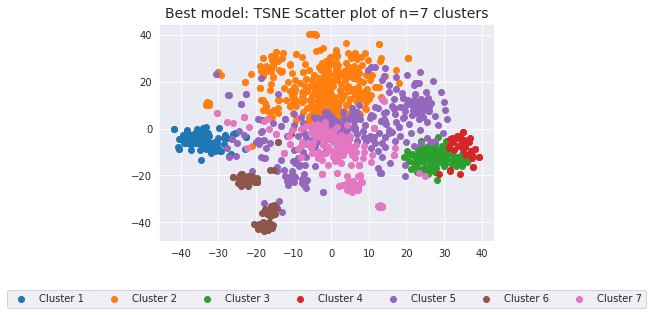

In [ ]:
X_txt = np.vstack(np.array(MODEL['USE']))
X_img = np.vstack(np.array(MODEL['RESNET']))
X_name = np.vstack(np.array(MODEL['name_USE']))
X = np.concatenate(( X_name, X_txt, X_img), axis=1 ) 
kmeans = KMeans(n_clusters = 7)
labels = kmeans.fit_predict(X)
TSNE_clusters(X, n_clusters, labels, "Best model" )

/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:780: FutureWarning:

The default initialization in TSNE will change from 'random' to 'pca' in 1.2.

/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:790: FutureWarning:

The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.



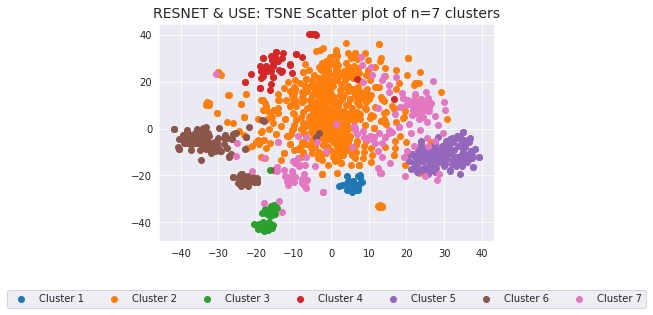

Cluster : 1 => Size = 23
Cluster : 2 => Size = 535
Cluster : 3 => Size = 42
Cluster : 4 => Size = 49
Cluster : 5 => Size = 132
Cluster : 6 => Size = 123
Cluster : 7 => Size = 146


In [ ]:
model = "RESNET & USE"

labels = LABELS[clusters.index(n_clusters)]
TSNE_clusters(X, n_clusters , labels, model )
Cluster_size_plot(n_clusters, labels, model)
ari = adjusted_rand_score(labels, data['category_label'])

In [ ]:
ari

0.20264100250173772

## Clustering evaluation

ARI : Product category/ clusters

In [ ]:
def ARI(labels):
  return adjusted_rand_score(labels, data['category_label'])

In [ ]:
print(f'ARI of image features based clustering = {round(ARI(Model_img["labels"]), 2)}')

ARI of image features based clustering = 0.29


In [ ]:
print(f'ARI of text features based clustering = {round(ARI(Model_txt["labels"]), 2)}')

ARI of text features based clustering = 0.3


In [ ]:
print(f'ARI of all features based clustering = {round(ARI(Model["labels"]), 2)}')

ARI of all features based clustering = 0.31


In [ ]:
data.sample(3)